In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Data Preprocessing 

In [2]:
# read data
data = pd.read_csv('breast-cancer-wisconsin.data', header=None, na_values=['?'])
data.columns= ['ID', 'Clump Thickness', 'Uniformity of Cell Size','Uniformity of Cell Shape', \
                    'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', \
                    'Mitoses', 'Class']

In [3]:
data.head()

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [4]:
data.shape

(699, 11)

In [5]:
## check missing values, we find there are 16 missing vlaues in 'Bare Nuclei'
data.isnull().sum()

ID                              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [6]:
## impute missing value, since 'Bare Nuclei' is ordinal data, we use the mode value to fill missing vlaues
data['Bare Nuclei'].fillna(data['Bare Nuclei'].mode()[0], inplace=True)
data.isnull().sum()

ID                             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [7]:
# check the type of data
print(data.dtypes)

ID                               int64
Clump Thickness                  int64
Uniformity of Cell Size          int64
Uniformity of Cell Shape         int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                    float64
Bland Chromatin                  int64
Normal Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object


In [8]:
df = data.iloc[:, 1:10]
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1


In [9]:
colnames = df.columns.values

In [10]:
## get the data for KNN, standardize the data 
df_x = np.array(df)
df_x= (df_x - df_x.mean()) / df_x.std()
df_y = np.array(data['Class'])
df_y

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4,
       2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 4, 4, 4,
       4, 2, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4,
       2, 4, 4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4,
       2, 4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2,
       2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4,
       2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2,
       2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4,
       4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4,
       4, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 4,

In [11]:
## get the data for Decision Tree algorithm
x = np.array(df)
x

array([[ 5.,  1.,  1., ...,  3.,  1.,  1.],
       [ 5.,  4.,  4., ...,  3.,  2.,  1.],
       [ 3.,  1.,  1., ...,  3.,  1.,  1.],
       ...,
       [ 5., 10., 10., ...,  8., 10.,  2.],
       [ 4.,  8.,  6., ..., 10.,  6.,  1.],
       [ 4.,  8.,  8., ..., 10.,  4.,  1.]])

# Implementation 

## KNN algorithm

In [12]:
## distance function
def dist(p1, p2):
    return np.sum(np.square(p1-p2))**0.5

In [13]:
class KNN:
    def __init__(self, k=5):
        self.k = k
        self.X_train = None
        self.y_train = None
        
    def fit(self, training_data, training_labels):
        self.X_train = training_data
        self.y_train = training_labels
        
    def neighbors(self, obs):
        distances = []
        ### get the neighbors of point
        for i, p in enumerate(self.X_train):
            distances.append((i, dist(obs, p)))
        distances_sort = sorted(distances, key = lambda x:x[1])
        index = [d[0] for d in distances_sort[:self.k]]
        return self.y_train[index]
    
    '''
    def labels(self, neighbors):
        ### find the most voted label
        label, count = None, 0
        for l in set(neighs):
            if neighs.count(l) > count:
                count = neighs.count(l)
                label = l
        return label
            
    '''    

    def predict(self, test_data):
        predictions = []
        for obs in test_data:
            neighs = self.neighbors(obs)
        
            ## find the most voted label 
            label, count = None, 0
            for l in set(neighs):
                if list(neighs).count(l) > count:
                    count = list(neighs).count(l)
                    label = l
            predictions.append(label)
        
        return np.array(predictions)
    
    def accuracy_score(self, predicted_labels, labels):
        TP = sum((predicted_labels==4) & (labels==4))
        TN = sum((predicted_labels==2) & (labels==2))
        return (TP + TN) / len(labels)
    
    

## Performance metrics

In [14]:
## confusion matrix function; 2 for benign, 4 for malignant; malignant is True
## the accuracy, TPR, PPV, TNR, F1_score
def confusion_matrix(predicted_labels, labels):
    FP = sum((labels==2) & (predicted_labels==4))
    FN = sum((labels==4) & (predicted_labels==2))
    TP = sum((labels==4) & (predicted_labels==4))
    TN = sum((labels==2) & (predicted_labels==2))
    
    ## print performance metrics
    accuracy = (TN + TP) / (TN + TP + FN + FP)
    TPR = TP / (TP + FN)
    PPV = TP / (TP + FP)
    TNR = TN / (TN + FP)
    F1_score = 2*PPV*TPR / (PPV+TPR)
    metric = pd.DataFrame([accuracy, TPR, PPV, TNR, F1_score], ['ACCU', 'TPR', 'PPV', 'TNR', 'F1'], ['score'])
    
    ### print confusion matrix
    conf_matrix = np.array([[TP, FN], [FP, TN]])
    conf = pd.DataFrame(conf_matrix, ['malignant', 'benign'], ['malignant', 'benign'])
    return metric, conf

## Dicision tree implementaion 

In [54]:
class Node:
    def __init__(self, attr, thre):
        self.attr = attr
        self.thre = thre
        self.height = None
        self.left = None
        self.right = None
        self.leaf = False
        self.predict = None

        
class DecisionTree:
    def __init__(self, criterion='entropy', max_depth=None, impurity_thre=None):
        self.X_train = None
        self.y_train = None
        self.colnames = None
        self.criterion = criterion
        self.max_depth = max_depth
        self.impurity_thre = impurity_thre
    
    ## calculate the impurity measure we use, like gini, entropy, missclassification rate
    def impurity_measure(self, training_data, training_labels):
        impurity = None
        ## positve label and negative label
        p, n = sum(training_labels==4), sum(training_labels==2)
        if self.criterion == 'entropy':   ## entropy
            if p==0 or n==0:
                impurity = 0
            else:
                impurity = -1*(p/(p+n)*math.log(p/(p+n),2) + n/(p+n)*math.log(n/(p+n),2))
            return impurity  
        if self.criterion == 'gini':      ## gini index, the smaller the better
            if p==0 or n==0:
                impurity = 0
            else:
                impurity = 1 - (p/(p+n))**2 - (n/(p+n))**2
            return impurity  
        if self.criterion == 'misclassification error':
            if p==0 or n==0:
                return 0
            else:
                impurity = 1- max(p/(p+n), n/(p+n))
            return impurity
        else:
            print('Error, please specify a impurity measure !')
    
    def impurity_decrease(self, training_data, training_labels, attr, threshold):
        sub_x1, sub_y1 = training_data[training_data[:, attr] > threshold], training_labels[training_data[:, attr] > threshold]
        sub_x2, sub_y2 = training_data[training_data[:, attr] < threshold], training_labels[training_data[:, attr] < threshold]
        length = len(training_labels)
        
        impurity = self.impurity_measure(training_data, training_labels)
        
        # calcualte weighted impurity after split
        impurity_split = len(sub_y1) / length * self.impurity_measure(sub_x1, sub_y1) + len(sub_y2) / length * self.impurity_measure(sub_x2, sub_y2)
        
        # return impurity decrease
        return impurity - impurity_split

    ## choose the best split value for each attribute
    def chose_thre(self, training_data, training_labels, attr):
        # since it is ordinal data, we can find the threshold by iterating (v1+v2)/2
        values = set(training_data[:, attr])    # unique values
        values_sort = sorted(list(values))
        attr_thre = 0
        max_im_dec = float('-inf')
        
        # try all thresholds values 
        for i in range(len(values_sort)-1):
            thre = (values_sort[i] + values_sort[i+1])/2
            im_dec = self.impurity_decrease(training_data, training_labels, attr, thre)
            if im_dec > max_im_dec:
                max_im_dec = im_dec
                attr_thre = thre
        # find the best attr threshold
        return attr_thre
    
    # select the best attr based on the informaiton gain and threshold
    def chose_attr(self, training_data, training_labels):
        max_im_dec = float('-inf')
        best_thre = None
        best_attr = None
        for attr in range(training_data.shape[1]):
            thre = self.chose_thre(training_data, training_labels, attr)
            im_dec  = self.impurity_decrease(training_data, training_labels, attr, thre)
            # chose the best attribute and the threshold associated
            if im_dec > max_im_dec:
                max_im_dec = im_dec
                best_attr = attr
                best_thre = thre
        
        return best_attr, best_thre
    
    # build the decision tree
    def build_tree(self, training_data, training_labels, depth=1):
        P, N = sum(training_labels==4), sum(training_labels==2)
        
        # P==0 or N==0
        if P==0 or N==0:
            leaf = Node(None, None)
            leaf.leaf = True
            leaf.predict = 4 if P > N else 2
            return leaf
        # max_depth
        elif depth >= self.max_depth:
            # create a leaf none, since it is well separated
            leaf = Node(None, None)
            leaf.leaf = True
            leaf.predict = 4 if P > N else 2
            return leaf
        else:
            best_attr, best_thre = self.chose_attr(training_data, training_labels)
            impurity = self.impurity_decrease(training_data, training_labels, best_attr, best_thre)
            # impurity threshold
            if impurity < self.impurity_thre:
                # create a leaf none, since it is well separated
                leaf = Node(None, None)
                leaf.leaf = True
                leaf.predict = 4 if P > N else 2
                return leaf
                 
            else:
                root = Node(best_attr, best_thre)

                # split data 
                sub_x1 = training_data[training_data[:, best_attr] < best_thre]
                sub_y1 = training_labels[training_data[:, best_attr] < best_thre]
                sub_x2 = training_data[training_data[:, best_attr] > best_thre]
                sub_y2 = training_labels[training_data[:, best_attr] > best_thre] 

                # recursively bulid the tree
                root.left = self.build_tree(sub_x1, sub_y1, depth+1)
                root.right = self.build_tree(sub_x2, sub_y2, depth+1)

                return root
    
    def print_tree(self, root, level=0):
        print(level*' ', end=' ')
        if root.leaf:
            print(root.predict)
        else:
            print('%s < %.3f' %(self.colnames[root.attr], root.thre))
        
        if root.left:
            self.print_tree(root.left, level+1)
        if root.right:
            self.print_tree(root.right, level + 1)
        
    # the depth of a tree   
    def height(self, root):
        height_left = 0
        height_right = 0
        if root.left:
            height_left = self.height(root.left)
        if root.right:
            height_right = self.height(root.right)
        if height_left > height_right:
            return height_left + 1
        else:
            return height_right + 1
            
            
    # fit the training data
    def fit(self, training_data, training_labels, colnames):
        self.X_train = training_data
        self.y_train = training_labels
        self.colnames = colnames
        
    # predict testing data
    def predict(self, root, test_data):
        
        ## define a function to get the prediction for each obs
        def predict_obs(node, obs):
            if node.leaf:
                return node.predict
            if obs[node.attr] < node.thre:
                return predict_obs(node.left, obs)
            else:
                return predict_obs(node.right, obs)
        
        predictions = []
        for obs in test_data:
            pred = predict_obs(root, obs)
            predictions.append(pred)
        return np.array(predictions)
        
    def accuracy_score(self, predicted_labels, labels):
        TP = sum((predicted_labels==4) & (labels==4))
        TN = sum((predicted_labels==2) & (labels==2))
        return (TP + TN) / len(labels)
    

# Cross validataion 

In [16]:
## run pca analysis, get the principle components, the first 5 components
x_mean = x - x.mean()
u, s, vh = np.linalg.svd(x_mean)

s2 = np.cumsum(s**2) / np.sum(s**2)
print(s2)

pc_x = x_mean @ vh.T[:, :5]

[0.64938942 0.75549346 0.82181715 0.86459853 0.90512955 0.94148238
 0.96564001 0.98927807 1.        ]


In [17]:
## random split data, training dataset (80%) and test dataset (20%)
from sklearn.model_selection import train_test_split

knn_train_x, knn_test_x, knn_train_y, knn_test_y = train_test_split(df_x, df_y, test_size=0.2)
dt_train_x, dt_test_x, dt_train_y, dt_test_y = train_test_split(x, df_y, test_size=0.2)
dt_pca_train_x, dt_pca_test_x, dt_pca_train_y, dt_pca_test_y = train_test_split(pc_x, df_y, test_size=0.2)

In [18]:
import random

## run k-folder cross validation function 
def cv_train_test_split(X, Y, kfolder= 10):
    X_split, Y_split = [], []
    index = list(range(len(Y)))
    random.shuffle(index)   ## shuffle the index to random select
    fold_size = int(len(X) / kfolder) + (len(X)%kfolder > 0)
    for i in range(kfolder):
        X_fold = X[index[i*fold_size: (i+1)*fold_size]]
        Y_fold = Y[index[i*fold_size: (i+1)*fold_size]]
        X_split.append(X_fold)
        Y_split.append(Y_fold)
    return X_split, Y_split

## KNN 

In [19]:
knn_X, knn_Y = cv_train_test_split(knn_train_x, knn_train_y)

In [20]:
### KNN, to get the best k 
for k in [2,3,4,5,6,7,8,17,33]:
    scores = []
    for i in range(10):
        x_train, x_test = np.concatenate(knn_X[:i] + knn_X[i+1:], axis = 0), knn_X[i]
        y_train, y_test = np.concatenate(knn_Y[:i] + knn_Y[i+1:], axis = 0), knn_Y[i]
        clf = KNN(k)
        clf.fit(x_train, y_train)
        p = clf.predict(x_test)
        scores.append(clf.accuracy_score(p, y_test))
    print('The accuracy score for k= %s is %.3f' %(str(k), sum(scores)/len(scores)))

The accuracy score for k= 2 is 0.937
The accuracy score for k= 3 is 0.966
The accuracy score for k= 4 is 0.962
The accuracy score for k= 5 is 0.964
The accuracy score for k= 6 is 0.962
The accuracy score for k= 7 is 0.961
The accuracy score for k= 8 is 0.957
The accuracy score for k= 17 is 0.961
The accuracy score for k= 33 is 0.961


In [21]:
## k=3 is the best, run KNN with test data with k=33
k=3
clf = KNN(k)
clf.fit(knn_train_x, knn_train_y)
p = clf.predict(knn_test_x)
metric, confusion = confusion_matrix(p, knn_test_y)

In [22]:
metric

,score
ACCU,0.957143
TPR,0.926829
PPV,0.926829
TNR,0.969697
F1,0.926829


In [23]:
confusion

,malignant,benign
malignant,38,3
benign,3,96


## Decision Tree 

In [56]:
## decison tree
dtree_X, dtree_Y = cv_train_test_split(dt_train_x, dt_train_y)

In [58]:
### decision tree
### parameters: max_depth k from 2 to 10, impurity_decrease from 0 to 0.25 by step 0.05
score_matrix = np.zeros((9, 6))

for k in range(2,11):
    for im in [x/100 for x in range(0, 30, 5)]:
        scores = []
        for i in range(10):
            x_train, x_test = np.concatenate(dtree_X[:i] + dtree_X[i+1:], axis = 0), dtree_X[i]
            y_train, y_test = np.concatenate(dtree_Y[:i] + dtree_Y[i+1:], axis = 0), dtree_Y[i]
            t = DecisionTree('entropy', k, im)
            t.fit(x_train, y_train, colnames)
            tree = t.build_tree(x_train, y_train)
            p = t.predict(tree, x_test)
            scores.append(t.accuracy_score(p, y_test))
        score_matrix[k-2, int(im*20)] = sum(scores)/len(scores)
        print('The accuracy score for k=%s, im=%s is %.3f' %(str(k), str(im), sum(scores)/len(scores)))

The accuracy score for k=2, im=0.0 is 0.927
The accuracy score for k=2, im=0.05 is 0.927
The accuracy score for k=2, im=0.1 is 0.927
The accuracy score for k=2, im=0.15 is 0.927
The accuracy score for k=2, im=0.2 is 0.927
The accuracy score for k=2, im=0.25 is 0.927
The accuracy score for k=3, im=0.0 is 0.939
The accuracy score for k=3, im=0.05 is 0.939
The accuracy score for k=3, im=0.1 is 0.936
The accuracy score for k=3, im=0.15 is 0.928
The accuracy score for k=3, im=0.2 is 0.925
The accuracy score for k=3, im=0.25 is 0.927
The accuracy score for k=4, im=0.0 is 0.952
The accuracy score for k=4, im=0.05 is 0.952
The accuracy score for k=4, im=0.1 is 0.950
The accuracy score for k=4, im=0.15 is 0.945
The accuracy score for k=4, im=0.2 is 0.928
The accuracy score for k=4, im=0.25 is 0.927
The accuracy score for k=5, im=0.0 is 0.946
The accuracy score for k=5, im=0.05 is 0.948
The accuracy score for k=5, im=0.1 is 0.946
The accuracy score for k=5, im=0.15 is 0.941
The accuracy score fo

In [63]:
## heatmap
def plotHeatMap(data, x_title='X Axis', y_title='Y Axis', title='', x_ticks=[], y_ticks=[]):
    
    #Plot it out
    fig, ax = plt.subplots()
    ax = plt.gca()
    heatmap = ax.pcolor(data, edgecolors='k', alpha=0.8)
    
    fig.colorbar(heatmap, ax=ax)
    
    # turn off the frame
    #ax.set_frame_on(False)

    # put the major ticks at the middle of each cell
    ax.set_xticks(np.arange(len(x_ticks)) + 0.5, minor=False)
    ax.set_yticks(np.arange(len(y_ticks)) + 0.5, minor=False)
    
    ax.set_xticklabels([str(i/20) for i in x_ticks], minor=False)
    ax.set_yticklabels([str(y) for y in y_ticks], minor=False)
    
    ax.set_xlabel(x_title)
    ax.set_ylabel(y_title)
    ax.set_title(title)
    
    plt.show()

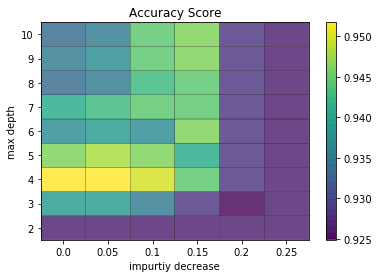

In [64]:
plotHeatMap(score_matrix, y_title='max depth', x_title='impurtiy decrease',\
            title='Accuracy Score', y_ticks=range(2,11), x_ticks=range(6))

In [65]:
score_df = pd.DataFrame(score_matrix, index = range(2,11), columns=[str(x/20) for x in range(0,30,5)])
score_df

,0.0,0.25,0.5,0.75,1.0,1.25
2,0.926688,0.926688,0.926688,0.926688,0.926688,0.926688
3,0.939221,0.939221,0.935649,0.928474,0.924903,0.926688
4,0.951721,0.951721,0.949935,0.944545,0.928474,0.926688
5,0.946364,0.948149,0.946364,0.940974,0.928474,0.926688
6,0.937435,0.939221,0.937435,0.946331,0.928474,0.926688
7,0.940974,0.942760,0.944578,0.944545,0.928474,0.926688
8,0.933831,0.935617,0.942792,0.944545,0.928474,0.926688
9,0.935649,0.937435,0.944578,0.946331,0.928474,0.926688
10,0.933864,0.935649,0.944578,0.946331,0.928474,0.926688


In [80]:
## max_depth is 4 and the impurity_increase=0.05 is the best, run DTree with test data
k, im = 4, 0.05
t = DecisionTree('entropy', k, im)
t.fit(dt_train_x, dt_train_y, colnames)
tree = t.build_tree(dt_train_x, dt_train_y)
print("The tree height for entropy is %d" % t.height(tree))
p = t.predict(tree, dt_test_x)
# metrics 
metric, confusion = confusion_matrix(p, dt_test_y)
print(metric)
print(confusion)

The tree height for entropy is 4
         score
ACCU  0.921429
TPR   0.909091
PPV   0.851064
TNR   0.927083
F1    0.879121
           malignant  benign
malignant         40       4
benign             7      89


In [81]:
## max_depth is 4 and the impurity_increase=0.05 is the best, run DTree with test data
k, im = 4, 0.05
t = DecisionTree('gini', k, im)
t.fit(dt_train_x, dt_train_y, colnames)
tree = t.build_tree(dt_train_x, dt_train_y)
print("The tree height for gini is %d" % t.height(tree))
p = t.predict(tree, dt_test_x)
# metrics 
metric, confusion = confusion_matrix(p, dt_test_y)
print(metric)
print(confusion)

The tree height for gini is 4
         score
ACCU  0.914286
TPR   0.840909
PPV   0.880952
TNR   0.947917
F1    0.860465
           malignant  benign
malignant         37       7
benign             5      91


In [82]:
## max_depth is 4 and the impurity_increase=0.05 is the best, run DTree with test data
k, im = 4, 0.05
t = DecisionTree('misclassification error', k, im)
t.fit(dt_train_x, dt_train_y, colnames)
tree = t.build_tree(dt_train_x, dt_train_y)
print("The tree height for misclassification error is %d" % t.height(tree))
p = t.predict(tree, dt_test_x)
# metrics 
metric, confusion = confusion_matrix(p, dt_test_y)
print(metric)
print(confusion)

The tree height for misclassification error is 2
         score
ACCU  0.907143
TPR   0.818182
PPV   0.878049
TNR   0.947917
F1    0.847059
           malignant  benign
malignant         36       8
benign             5      91


## Decision Tree with PCA

In [83]:
pca_X, pca_Y= cv_train_test_split(dt_pca_train_x, dt_pca_train_y)

In [84]:
### decision tree with pca
score_pca_matrix = np.zeros((9, 6))
for k in range(2,11):
    for im in [x/100 for x in range(0, 30, 5)]:
        scores = []
        for i in range(10):
            x_train, x_test = np.concatenate(pca_X[:i] + pca_X[i+1:], axis = 0), pca_X[i]
            y_train, y_test = np.concatenate(pca_Y[:i] + pca_Y[i+1:], axis = 0), pca_Y[i]
            t = DecisionTree('entropy', k, im)
            t.fit(x_train, y_train, colnames)
            tree = t.build_tree(x_train, y_train)
            p = t.predict(tree, x_test)
            scores.append(t.accuracy_score(p, y_test))
        print('The accuracy score for k=%s, im=%s is %.3f' %(str(k), str(im), sum(scores)/len(scores)))
        score_pca_matrix[k-2, int(im*20)] = sum(scores)/len(scores)

The accuracy score for k=2, im=0.0 is 0.973
The accuracy score for k=2, im=0.05 is 0.973
The accuracy score for k=2, im=0.1 is 0.973
The accuracy score for k=2, im=0.15 is 0.973
The accuracy score for k=2, im=0.2 is 0.973
The accuracy score for k=2, im=0.25 is 0.973
The accuracy score for k=3, im=0.0 is 0.973
The accuracy score for k=3, im=0.05 is 0.973
The accuracy score for k=3, im=0.1 is 0.973
The accuracy score for k=3, im=0.15 is 0.973
The accuracy score for k=3, im=0.2 is 0.973
The accuracy score for k=3, im=0.25 is 0.973
The accuracy score for k=4, im=0.0 is 0.971
The accuracy score for k=4, im=0.05 is 0.973
The accuracy score for k=4, im=0.1 is 0.973
The accuracy score for k=4, im=0.15 is 0.973
The accuracy score for k=4, im=0.2 is 0.973
The accuracy score for k=4, im=0.25 is 0.973
The accuracy score for k=5, im=0.0 is 0.968
The accuracy score for k=5, im=0.05 is 0.970
The accuracy score for k=5, im=0.1 is 0.973
The accuracy score for k=5, im=0.15 is 0.973
The accuracy score fo

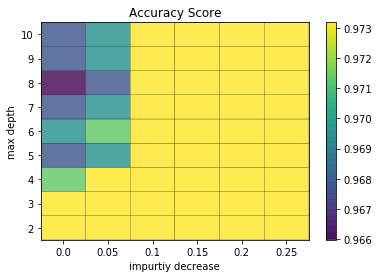

In [85]:
plotHeatMap(score_pca_matrix, y_title='max depth', x_title='impurtiy decrease',\
            title='Accuracy Score', y_ticks=range(2,11), x_ticks=range(6))

In [86]:
score_pca_df = pd.DataFrame(score_pca_matrix, index = range(2,11), columns=[str(x/20) for x in range(0,30,5)])
score_pca_df

,0.0,0.25,0.5,0.75,1.0,1.25
2,0.973182,0.973182,0.973182,0.973182,0.973182,0.973182
3,0.973182,0.973182,0.973182,0.973182,0.973182,0.973182
4,0.971396,0.973182,0.973182,0.973182,0.973182,0.973182
5,0.967792,0.969578,0.973182,0.973182,0.973182,0.973182
6,0.969578,0.971364,0.973182,0.973182,0.973182,0.973182
7,0.967792,0.969578,0.973182,0.973182,0.973182,0.973182
8,0.965974,0.967760,0.973182,0.973182,0.973182,0.973182
9,0.967760,0.969545,0.973182,0.973182,0.973182,0.973182
10,0.967760,0.969545,0.973182,0.973182,0.973182,0.973182


In [87]:
## max_depth is 4 and the impurity_increase=0.05 is the best, run DTree with test data
k, im = 4, 0.05
t = DecisionTree('entropy', k, im)
t.fit(dt_pca_train_x, dt_pca_train_y, colnames)
tree = t.build_tree(dt_pca_train_x, dt_pca_train_y)
print("The tree height for entropy is %d" % t.height(tree))
p = t.predict(tree, dt_pca_test_x)
# metrics 
metric, confusion = confusion_matrix(p, dt_pca_test_y)
print(metric)
print(confusion)

The tree height for entropy is 4
         score
ACCU  0.964286
TPR   1.000000
PPV   0.909091
TNR   0.944444
F1    0.952381
           malignant  benign
malignant         50       0
benign             5      85


In [88]:
## max_depth is 4 and the impurity_increase=0.05 is the best, run DTree with test data
k, im = 4, 0.05
t = DecisionTree('gini', k, im)
t.fit(dt_pca_train_x, dt_pca_train_y, colnames)
tree = t.build_tree(dt_pca_train_x, dt_pca_train_y)
print("The tree height for gini index is %d" % t.height(tree))
p = t.predict(tree, dt_pca_test_x)
# metrics 
metric, confusion = confusion_matrix(p, dt_pca_test_y)
print(metric)
print(confusion)

The tree height for gini index is 2
         score
ACCU  0.964286
TPR   1.000000
PPV   0.909091
TNR   0.944444
F1    0.952381
           malignant  benign
malignant         50       0
benign             5      85


In [89]:
## max_depth is 4 and the impurity_increase=0.05 is the best, run DTree with test data
k, im = 4, 0.05
t = DecisionTree('misclassification error', k, im)
t.fit(dt_pca_train_x, dt_pca_train_y, colnames)
tree = t.build_tree(dt_pca_train_x, dt_pca_train_y)
print("The tree height for misclassification error is %d" % t.height(tree))
p = t.predict(tree, dt_pca_test_x)
# metrics 
metric, confusion = confusion_matrix(p, dt_pca_test_y)
print(metric)
print(confusion)

The tree height for misclassification error is 2
         score
ACCU  0.964286
TPR   1.000000
PPV   0.909091
TNR   0.944444
F1    0.952381
           malignant  benign
malignant         50       0
benign             5      85
